In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from seaborn import load_dataset

In [4]:
iris = sns.load_dataset("iris")

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris.shape

(150, 5)

In [11]:
iris.describe().style.background_gradient(cmap='CMRmap')

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
x = iris.drop(['sepal_width', 'sepal_length', 'petal_width',
       'species'], axis=1)
y = iris.drop(['sepal_width', 'petal_length', 'petal_width',
       'species'], axis=1)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model

LinearRegression()

In [75]:
model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_predict = model.predict(x_test)

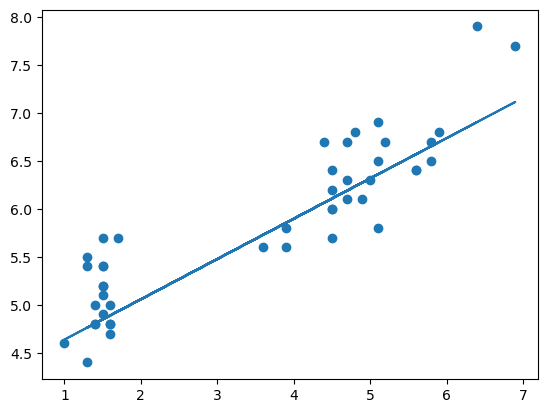

In [77]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict)

In [78]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [79]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [82]:
mae = mean_absolute_error(y_test, y_predict)
mae

0.3001300018241148

In [85]:
# y_test

# random forest

In [44]:
x = iris.drop(['species'], axis = 1)
y = iris["species"]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size= .3)

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3000, random_state=42)

In [47]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=3000, random_state=42)

In [48]:
y_predi = clf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

print(f"accuracy  : {accuracy_score(y_test, y_predi):.4f}")

accuracy  : 1.0000


In [52]:
print(clf.feature_importances_)

[0.10533699 0.04047875 0.4297127  0.42447157]


In [55]:
feature_score = pd.Series(clf.feature_importances_, index= x_train.columns).sort_values(ascending=False)

In [56]:
feature_score

petal_length    0.429713
petal_width     0.424472
sepal_length    0.105337
sepal_width     0.040479
dtype: float64

<AxesSubplot:>

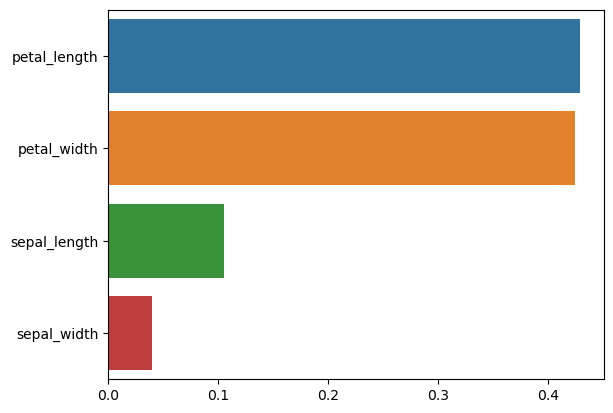

In [57]:
sns.barplot(x = feature_score, y = feature_score.index)

In [60]:
# confusion metrix

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(y_test, y_predi)

In [63]:
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# logisti regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [86]:
x = iris.drop(['species'], axis = 1)
y = iris["species"]

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size= .3)

In [90]:
l_model = LogisticRegression()

l_model.fit(x_train, y_train)

LogisticRegression()

In [91]:
y_predict_l = l_model.predict(x_test)

In [92]:
print(f"acccuracy : {accuracy_score(y_test,y_predict_l)}")

acccuracy : 1.0


In [93]:
print("report \n ", classification_report(y_test, y_predict_l))

report 
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print results
print("Support Vector Machines (SVM) Results:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:")
print(classification_rep_svm)


Support Vector Machines (SVM) Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print results
print("K-Nearest Neighbors (KNN) Results:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_rep_knn)


K-Nearest Neighbors (KNN) Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Print results
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Classification Report:")
print(classification_rep_nb)


Naive Bayes Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [97]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print results
print("XGBoost Results:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print("Classification Report:")
print(classification_rep_xgb)


ModuleNotFoundError: No module named 'xgboost'